In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import optimize
from scipy import integrate
from scipy import special
import pandas as pd

In [2]:
# parameters
m = 100                                #GeV DM Mass
Mp = 1.22e19                            #GeV Planck Mass

In [3]:
#     Bessel functions
# kn(n, x[, out])    Modified Bessel function of the second kind of integer order n      *****
# kv(v, z[, out])    Modified Bessel function of the second kind of real order v       
# kve(v, z[, out])   Exponentially scaled modified Bessel function of the second kind.
# iv(v, z[, out])    Modified Bessel function of the first kind of real order.

#     Faster versions of common Bessel functions
# i0(x[, out])        Modified Bessel function of order 0.
# i1(x[, out])        Modified Bessel function of order 1.             ********
# k0(x[, out])        Modified Bessel function of the second kind of order 0,.
# k1(x[, out])        Modified Bessel function of the second kind of order 1,.

#      Integrals of Bessel functions
#iti0k0(x[, out])       Integrals of modified Bessel functions of order 0.
#it2i0k0(x[, out])      Integrals related to modified Bessel functions of order 0.


# K_i are the modified Bessel functions of order i !!!!

#I think in our case the K_i are the modified bessel function of second kind and order i...

In [4]:
def I(n,attempt):
    return special.kn(n,attempt)

In [5]:
attempt=np.linspace(0,5,1000)

In [6]:
test=I(1,attempt)

print(test)

[           inf 1.99785202e+02 9.98738730e+01 6.65638529e+01
 4.99046825e+01 3.99061436e+01 3.32381075e+01 2.84733465e+01
 2.48982287e+01 2.21162803e+01 1.98896089e+01 1.80668229e+01
 1.65469902e+01 1.52602316e+01 1.41566306e+01 1.31995801e+01
 1.23616229e+01 1.16217612e+01 1.09636619e+01 1.03744299e+01
 9.84374816e+00 9.36326410e+00 8.92614325e+00 8.52673923e+00
 8.16034626e+00 7.82301112e+00 7.51138841e+00 7.22262805e+00
 6.95428684e+00 6.70425833e+00 6.47071669e+00 6.25207152e+00
 6.04693099e+00 5.85407185e+00 5.67241459e+00 5.50100296e+00
 5.33898680e+00 5.18560776e+00 5.04018723e+00 4.90211606e+00
 4.77084595e+00 4.64588201e+00 4.52677639e+00 4.41312285e+00
 4.30455197e+00 4.20072716e+00 4.10134098e+00 4.00611215e+00
 3.91478275e+00 3.82711586e+00 3.74289350e+00 3.66191470e+00
 3.58399393e+00 3.50895964e+00 3.43665292e+00 3.36692639e+00
 3.29964318e+00 3.23467598e+00 3.17190623e+00 3.11122338e+00
 3.05252424e+00 2.99571233e+00 2.94069740e+00 2.88739489e+00
 2.83572550e+00 2.785614

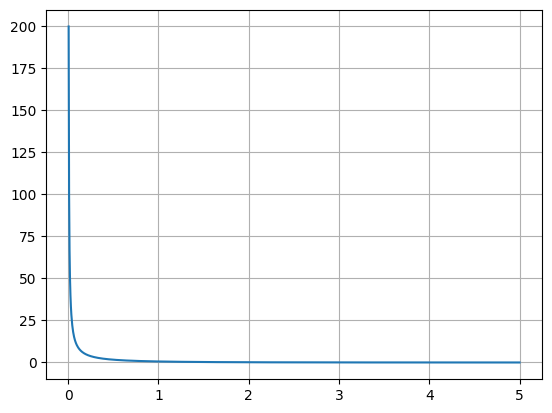

In [7]:
plt.plot(attempt,test)
plt.grid()

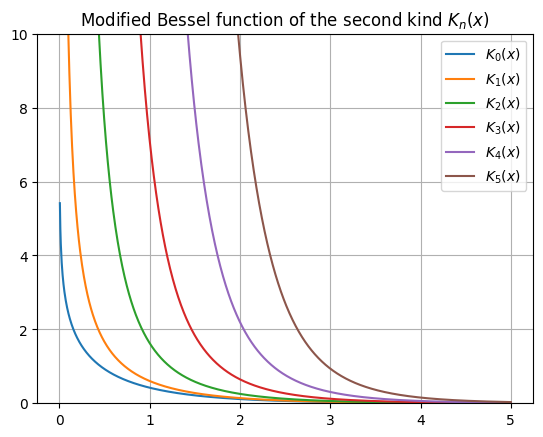

In [8]:
for N in range(6):
    plt.plot(attempt, special.kn(N, attempt), label='$K_{}(x)$'.format(N))
plt.ylim(0, 10)
plt.legend()
plt.title(r'Modified Bessel function of the second kind $K_n(x)$')
plt.grid()
plt.show()


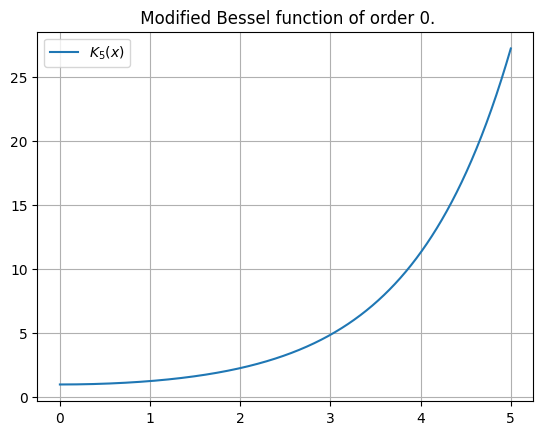

In [9]:

plt.plot(attempt, special.i0(attempt), label='$K_{}(x)$'.format(N))
plt.legend()
plt.title(r' Modified Bessel function of order 0.')
plt.grid()
plt.show()


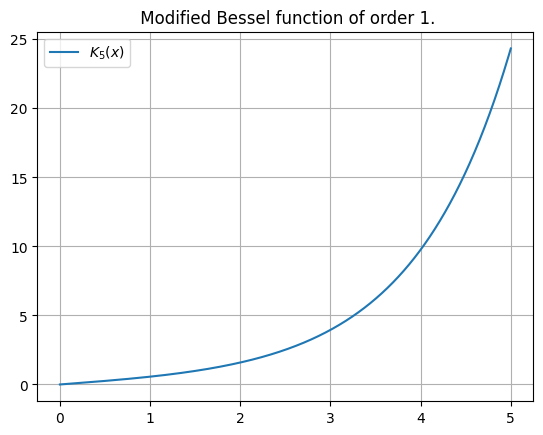

In [10]:
plt.plot(attempt, special.i1(attempt), label='$K_{}(x)$'.format(N))

plt.legend()
plt.title(r' Modified Bessel function of order 1.')
plt.grid()
plt.show()


In [11]:
attempt


array([0.        , 0.00500501, 0.01001001, 0.01501502, 0.02002002,
       0.02502503, 0.03003003, 0.03503504, 0.04004004, 0.04504505,
       0.05005005, 0.05505506, 0.06006006, 0.06506507, 0.07007007,
       0.07507508, 0.08008008, 0.08508509, 0.09009009, 0.0950951 ,
       0.1001001 , 0.10510511, 0.11011011, 0.11511512, 0.12012012,
       0.12512513, 0.13013013, 0.13513514, 0.14014014, 0.14514515,
       0.15015015, 0.15515516, 0.16016016, 0.16516517, 0.17017017,
       0.17517518, 0.18018018, 0.18518519, 0.19019019, 0.1951952 ,
       0.2002002 , 0.20520521, 0.21021021, 0.21521522, 0.22022022,
       0.22522523, 0.23023023, 0.23523524, 0.24024024, 0.24524525,
       0.25025025, 0.25525526, 0.26026026, 0.26526527, 0.27027027,
       0.27527528, 0.28028028, 0.28528529, 0.29029029, 0.2952953 ,
       0.3003003 , 0.30530531, 0.31031031, 0.31531532, 0.32032032,
       0.32532533, 0.33033033, 0.33533534, 0.34034034, 0.34534535,
       0.35035035, 0.35535536, 0.36036036, 0.36536537, 0.37037

$$\langle \sigma v \rangle = \frac{1}{8m^4TK_2^2(m/T)} \int_{4m^2}^{\infty} \sigma(\tilde{s}-4m^2)\sqrt{\tilde{s}}K_1(\sqrt{\tilde{s}}/T)ds \rightarrow^{\text{non-rel.}} b_0 + \frac{3}{2}b_1 x^{-1}+...$$  for usual WIMP DM

$$\langle \sigma v \rangle = \frac{1}{8 m_1^2m_2^2TK_2(m_1/T)K_2(m_2/T)} \int_{s_0}^{\infty} \sigma(\tilde{s}-4m^2)\sqrt{\tilde{s}}K_1(\sqrt{\tilde{s}}/T)ds \rightarrow^{\text{non-rel.}} b_0 + \frac{3}{2}b_1 x^{-1}+...$$  for iDM

In [12]:
# LET'S BUILD THE DENOMINATOR

In [13]:
# in our care K_1,2 are the modified bessel functions of second kind and order 1 and 2

In [19]:
def DEN(x):
    #T=m/x
    return 1/(8* m**4  *Ttrue *(special.kn(2,x))**2)

In [15]:
# IN PRINCIPLE x WAS MADE TO REACH 1000, BUT THE MODIFIED BESSEL FUNCTION GIVES PROBLEM

x=np.logspace(np.log10(1),np.log10(100),100)

In [16]:
x

array([  1.        ,   1.04761575,   1.09749877,   1.149757  ,
         1.20450354,   1.26185688,   1.32194115,   1.38488637,
         1.45082878,   1.51991108,   1.59228279,   1.66810054,
         1.7475284 ,   1.83073828,   1.91791026,   2.009233  ,
         2.10490414,   2.20513074,   2.3101297 ,   2.42012826,
         2.53536449,   2.65608778,   2.7825594 ,   2.91505306,
         3.05385551,   3.19926714,   3.35160265,   3.51119173,
         3.67837977,   3.85352859,   4.03701726,   4.22924287,
         4.43062146,   4.64158883,   4.86260158,   5.09413801,
         5.33669923,   5.59081018,   5.85702082,   6.13590727,
         6.42807312,   6.73415066,   7.05480231,   7.39072203,
         7.74263683,   8.11130831,   8.49753436,   8.90215085,
         9.32603347,   9.77009957,  10.23531022,  10.72267222,
        11.23324033,  11.76811952,  12.32846739,  12.91549665,
        13.53047775,  14.17474163,  14.84968262,  15.55676144,
        16.29750835,  17.07352647,  17.88649529,  18.73

In [17]:
T=m/x
T

array([100.        ,  95.45484567,  91.11627561,  86.97490026,
        83.02175681,  79.24828984,  75.64633276,  72.20809018,
        68.92612104,  65.79332247,  62.80291442,  59.94842503,
        57.22367659,  54.62277218,  52.14008288,  49.77023564,
        47.50810162,  45.34878508,  43.28761281,  41.320124  ,
        39.44206059,  37.64935807,  35.93813664,  34.30469286,
        32.74549163,  31.2571585 ,  29.8364724 ,  28.48035868,
        27.18588243,  25.95024211,  24.77076356,  23.64489413,
        22.5701972 ,  21.5443469 ,  20.56512308,  19.6304065 ,
        18.73817423,  17.88649529,  17.07352647,  16.29750835,
        15.55676144,  14.84968262,  14.17474163,  13.53047775,
        12.91549665,  12.32846739,  11.76811952,  11.23324033,
        10.72267222,  10.23531022,   9.77009957,   9.32603347,
         8.90215085,   8.49753436,   8.11130831,   7.74263683,
         7.39072203,   7.05480231,   6.73415066,   6.42807312,
         6.13590727,   5.85702082,   5.59081018,   5.33

In [18]:
Ttrue=np.flip(T)
Ttrue

array([  1.        ,   1.04761575,   1.09749877,   1.149757  ,
         1.20450354,   1.26185688,   1.32194115,   1.38488637,
         1.45082878,   1.51991108,   1.59228279,   1.66810054,
         1.7475284 ,   1.83073828,   1.91791026,   2.009233  ,
         2.10490414,   2.20513074,   2.3101297 ,   2.42012826,
         2.53536449,   2.65608778,   2.7825594 ,   2.91505306,
         3.05385551,   3.19926714,   3.35160265,   3.51119173,
         3.67837977,   3.85352859,   4.03701726,   4.22924287,
         4.43062146,   4.64158883,   4.86260158,   5.09413801,
         5.33669923,   5.59081018,   5.85702082,   6.13590727,
         6.42807312,   6.73415066,   7.05480231,   7.39072203,
         7.74263683,   8.11130831,   8.49753436,   8.90215085,
         9.32603347,   9.77009957,  10.23531022,  10.72267222,
        11.23324033,  11.76811952,  12.32846739,  12.91549665,
        13.53047775,  14.17474163,  14.84968262,  15.55676144,
        16.29750835,  17.07352647,  17.88649529,  18.73

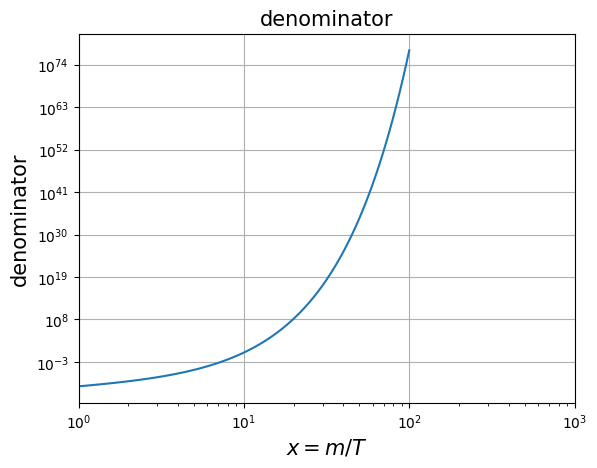

In [20]:
plt.plot(x,DEN(x))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('denominator', size= 15)
plt.title('denominator', size= 15)
plt.grid()

In [21]:
# LET'S BUILD THE NUMERATOR

$$s-s_0=-2m^2+2E_1E_2-2 \vec{p_1} \cdot \vec{p_2}$$

$$\tilde{s}- 4m^2=2m^2+2E_1E_2-2p_1 \cdot p_2- 4m^2 $$

$$\vec{p_1} \cdot \vec{p_2}=2p_1p_2 \cos \theta_{CM}$$

In [53]:
s_tilda=np.linspace(0,10,100)

#doesn't change much between the choice of 10 or 99

In [44]:
special.kn(1,np.sqrt(s_tilda[0])/T[0])

inf

In [45]:
def integr(s_tilda):
    return np.sqrt(s_tilda)* special.kn(1,np.sqrt(s_tilda)/Ttrue)


container=[]
for value in range(len(Ttrue)):
    container.append(integrate.quad(lambda s_tilda: np.sqrt(s_tilda)* special.kn(1,np.sqrt(s_tilda)/Ttrue[value]), 4*m**2,np.inf)[0])     

/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_1048/2921662118.py:7: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  container.append(integrate.quad(lambda s_tilda: np.sqrt(s_tilda)* special.kn(1,np.sqrt(s_tilda)/Ttrue[value]), 4*m**2,np.inf)[0])


In [46]:
container

[1.2626870124779289e-83,
 1.1957965255029092e-79,
 7.480021241601649e-76,
 3.149212890283335e-72,
 9.085632670811883e-69,
 1.8272998471327967e-65,
 2.6042130668508473e-62,
 2.671431234865724e-59,
 2.0021363796531175e-56,
 1.1120219038402446e-53,
 4.6399211610183877e-51,
 1.4734157475046214e-48,
 3.605302631145509e-46,
 6.878599929674799e-44,
 1.0349215398659673e-41,
 1.2412191548774324e-39,
 1.1989341517289494e-37,
 9.419271240119748e-36,
 6.075611441206626e-34,
 3.246415345879634e-32,
 1.449351470328521e-30,
 5.450602031961556e-29,
 1.740207444862097e-27,
 4.7519777349555215e-26,
 1.1177610406129594e-24,
 2.2801797688873468e-23,
 4.0601814182750133e-22,
 6.349815363670642e-21,
 8.773589639981036e-20,
 1.0770579296333012e-18,
 1.1810826156488213e-17,
 1.1628640059485478e-16,
 1.0330273319454576e-15,
 8.318770637359575e-15,
 6.099706936733207e-14,
 4.08988683489497e-13,
 2.5178631749345063e-12,
 1.4287534379682628e-11,
 7.50060059826087e-11,
 3.6558180023173335e-10,
 1.6599281822047455e

In [47]:
print(len(container))
print(container[0])
print(container[1])
print(container[99])
print(4*m**2)

100
1.2626870124779289e-83
1.1957965255029092e-79
2030102.6489223014
40000


/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_1048/2540076075.py:3: RuntimeWarning: invalid value encountered in multiply
  plt.plot(linspace, np.sqrt(s_tilda)* special.kn(1,np.sqrt(s_tilda)/Ttrue[N]))


(0.0, 40000.0)

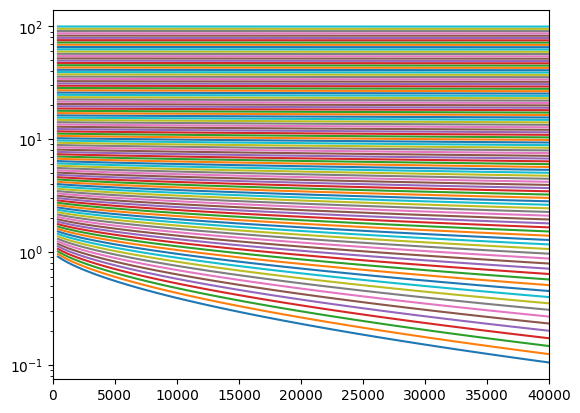

In [48]:
linspace=np.linspace(0,4*m**2,100)
for N in range(100):
    plt.plot(linspace, np.sqrt(s_tilda)* special.kn(1,np.sqrt(s_tilda)/Ttrue[N]))

plt.yscale('log')
plt.xlim(0, 4*m**2)



# THOSE IN PRINCIPLE SHOULD BE THE PLOT OF THE VARIOUS FUNCTION THAT I HAVE TO INTEGRATE FROM 4*M**2 TO INFINITY

# MAKE SENSE?!?!?!?

# IN MY INTEGRATION s_tilda is a variable in which it integrates into, here is from 0 to 100 GeV, maybe too much?

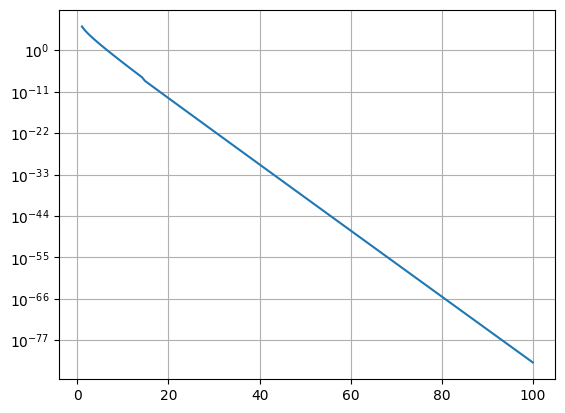

In [49]:
plt.plot(T,container)
plt.yscale('log')
plt.grid()

# How do I understand which values choose for s_tilda and T??
# They seems not in correlation in each other...
# They are like that just because I chose s_tilda to go from 1 to 100 and T same
# But in principle they can behave differently

# Quello che voglio dire è che s si accoppia con in valori di T a caso
# Il rpimo valore di s è 1, quello di T è 100 e si accoppiano così dando K1(1/100) e così via

# Esiste un legame fra s e la temperatura?!?!?!?!?!?!?!?

In [65]:
Total= (container/DENOM(x1,x2))
Total

array([1.47602996e-87, 1.16182541e-83, 6.01913601e-80, 2.09092703e-76,
       4.95728087e-73, 8.15788437e-70, 9.46949686e-67, 7.87315806e-64,
       4.75758660e-61, 2.11876213e-58, 7.04676253e-56, 1.77250539e-53,
       3.41264176e-51, 5.08699263e-49, 5.93497493e-47, 5.47586015e-45,
       4.03485266e-43, 2.39661454e-41, 1.15774537e-39, 4.58696747e-38,
       1.50245522e-36, 4.09945259e-35, 9.38448904e-34, 1.81468552e-32,
       2.98320863e-31, 4.19458473e-30, 5.07341965e-29, 5.30712931e-28,
       4.82579149e-27, 3.83263556e-26, 2.67047400e-25, 1.63930120e-24,
       8.90033536e-24, 4.28955746e-23, 1.84138893e-22, 7.06259421e-22,
       2.42728504e-21, 7.49485625e-21, 2.08419656e-20, 5.23111958e-20,
       1.18735895e-19, 2.44149884e-19, 1.12495585e-18, 1.97196240e-18,
       3.19499006e-18, 4.68039306e-18, 6.24820937e-18, 7.60509141e-18,
       8.44209681e-18, 8.54730668e-18, 7.89206151e-18, 6.64348659e-18,
       5.09590207e-18, 3.55920316e-18, 2.26146620e-18, 1.30569803e-18,
      

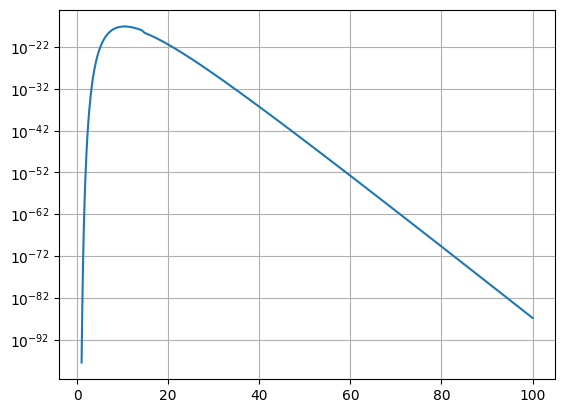

In [66]:
plt.plot(T,Total)
plt.yscale('log')
plt.grid() 


# Now of iDM

$$\langle \sigma v \rangle = \frac{1}{8 m_1^2m_2^2TK_2(m_1/T)K_2(m_2/T)} \int_{s_0}^{\infty} \sigma(\tilde{s}-4m^2)\sqrt{\tilde{s}}K_1(\sqrt{\tilde{s}}/T)ds \rightarrow^{\text{non-rel.}} b_0 + \frac{3}{2}b_1 x^{-1}+...$$  for iDM

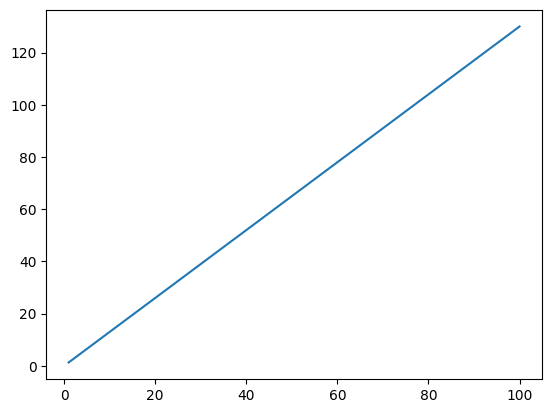

In [62]:

# parameters
m1 = 0.050                                #GeV DM Mass
delta=0.3*m1
m2=m1+delta
Mp = 1.22e19                            #GeV Planck Mass


x1=np.logspace(np.log10(1),np.log10(100),100)
x2=x1*((m1+delta)/m1)
plt.plot(x1,x2)

In [59]:
def DENOM(x1,x2):
    #T=m/x
    return 1/(8* m1**2 * m2**2  *Ttrue *(special.kn(2,x1)*(special.kn(2,x2))))

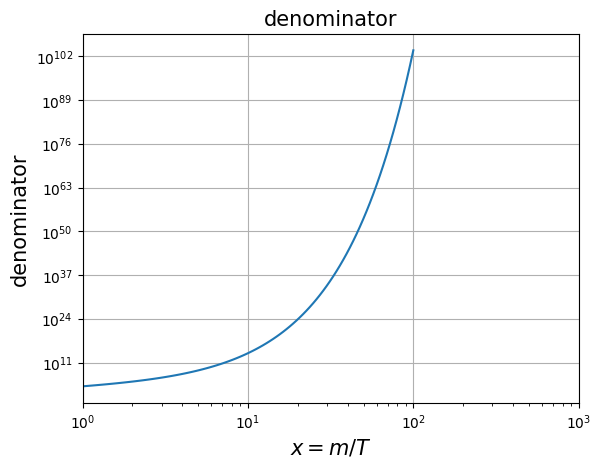

In [63]:
plt.plot(x1,DENOM(x1,x2))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('denominator', size= 15)
plt.title('denominator', size= 15)
plt.grid()

In [49]:
import numpy as np
from quadpy import quad

y = lambda t: 3 * t

interv = 4
n = np.linspace(0.5, 4.5, 60)
w = 2 * np.pi * n / interv


# for odd functions
def integrand(t):
    return y(t) * np.sin(np.multiply.outer(n * w, t))


Bn = (2 / interv) * quad(integrand, -interv / 2, interv / 2)[0]
print(Bn)



#numpy.outer(a, b, out=None)[source]
#     Compute the outer product of two vectors.
#     Given two vectors, a = [a0, a1, ..., aM] and b = [b0, b1, ..., bN], the outer product [1] is:

#  [[a0*b0  a0*b1 ... a0*bN ]
#   [a1*b0    .
#   [ ...          .
#   [aM*b0            aM*bN ]]

From Jan 1, 2023, ndim will require a Sigma license to run.

[ 2.95202424  3.65065844  4.30452305  4.83920711  5.16968359  5.21061601
  4.89262598  4.1833766   3.10978943  1.77475666  0.35941872 -0.89784345
 -1.75022471 -2.01405724 -1.64454888 -0.78464672  0.2471985   1.04991845
  1.29782131  0.90298561  0.0915042  -0.6803066  -0.96583944 -0.6086161
  0.12447953  0.69467707  0.67672741  0.11041719 -0.49815799 -0.59917747
 -0.1182072   0.43952881  0.48519855 -0.01003534 -0.45248957 -0.31093077
  0.21208477  0.41427311  0.0327651  -0.36592611 -0.1926715   0.26321709
  0.26646664 -0.1691014  -0.28499103  0.10849924  0.27684235 -0.08460783
 -0.25741944  0.09235562  0.22931636 -0.12369155 -0.18616538  0.16646664
  0.1182814  -0.20066427 -0.02183788  0.19774675 -0.08806038 -0.13128359]


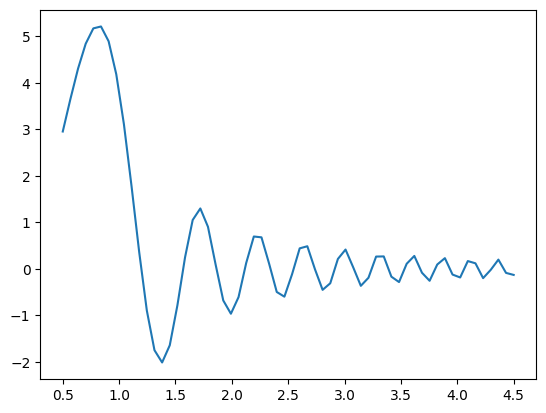

In [50]:
plt.plot(n,Bn)

In [51]:
s_tilda=np.linspace(1,100,100)
s_tilda

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

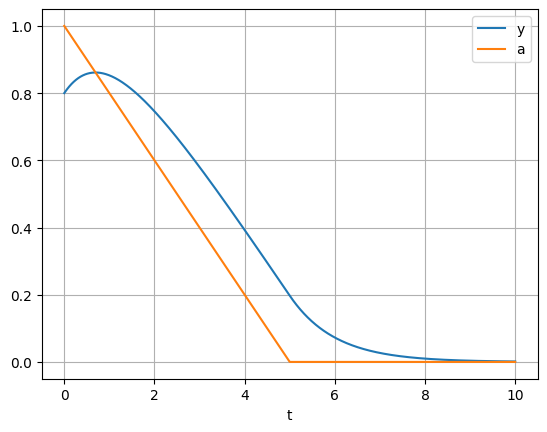

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate

tmax = 10.0

def a(t):
    if t < tmax / 2.0:
        return ((tmax / 2.0) - t) / (tmax / 2.0)
    else:
        return 0

def func(x, t, a):
    return - (x - a(t))

x0 = 0.8
t = np.linspace(0.0, tmax, 1000)
args = (a,)
y = sp.integrate.odeint(func, x0, t, args)

fig = plt.figure()
ax = fig.add_subplot(111)
h1, = ax.plot(t, y)
h2, = ax.plot(t, [a(s) for s in t])
ax.legend([h1, h2], ["y", "a"])
ax.set_xlabel("t")
ax.grid()
plt.show()